# Методы численного интегрирования 

In [96]:
import random 
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

# Исходные параметры 

In [97]:
# Пределы интегрирования
start_int = 1 
end_int = 3

n = 1000 # количество прямоугольников

h = (end_int - start_int) / n # ширина прямоугольника

# Интеграл

In [98]:
def integral(x):
    return ((x**2)*(np.exp(x)))/((x+2)**2)

# Решения интеграла 

In [99]:
def ret():
    return quad(integral, start_int, end_int)[0] 
ret()

4.923201327457217

График 

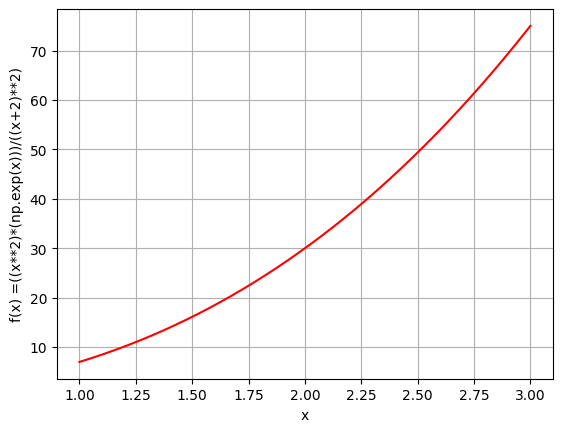

In [100]:
x1 = np.linspace(start_int, end_int, n)
y = x1**3 + 5*(x1**2) + x1
plt.plot(x1, y, color = 'red')
plt.xlabel('x')
plt.ylabel('f(x) =((x**2)*(np.exp(x)))/((x+2)**2)')
plt.grid(True)
plt.show()

# Метод левых прямоугольников 

In [101]:
def left_rectandles():
    print("Метод левых прямоугольников",end="\n")
    
    total = sum([integral((start_int + (k*h))) for k in range(0, n)])
    
    result = h * total
    print(f"Результат: {result}\n")
    return result

In [102]:
left_rectandles()

Метод левых прямоугольников
Результат: 4.916275383567281



4.916275383567281

# Метод правых прямоугольников 

In [103]:
def right_rectandles():
    print("Метод правых прямоугольников",end="\n")
   
    total = sum([integral((start_int+h + (k*h))) for k in range(0, n)])
    
    result = h * total
    print(f"Результат: {result}\n")
    return result

In [104]:
right_rectandles()

Метод правых прямоугольников
Результат: 4.93013290752343



4.93013290752343

# Метод трапеции

In [105]:
def trapezoid():
    print("Метод трапеции",end="\n")

    sum_ = 0.5 * (integral(start_int)+integral(end_int))
    
    total = sum([integral((start_int + k*h)) for k in range(0, n)])
    
    result = h * (total+sum_)
    print(f"Результат: {result}\n")
    return result

In [106]:
trapezoid()

Метод трапеции
Результат: 4.923808208173902



4.923808208173902

# Метод Монте-Карло

In [107]:
def monte_carlo():
    print("Метод Монте Карло ",end="\n") 
    
    total = 0
    
    for i in range(1, n):
        rangom_num = start_int + random.random() * (end_int-start_int)
    
        intes = integral(rangom_num)   
        
        total += h * intes
        
    print(f"Результат: {total}\n")
    
    return total 


In [108]:
monte_carlo()

Метод Монте Карло 
Результат: 4.787654316950756



4.787654316950756

# Метод Симпсона

In [109]:
def simpson():
    print("Метод Симпсона ",end="\n") 

    var1 = integral(h)
    var2 = 0
    var3 = 0
    var4 = integral(start_int + (2* n *h))
    
    for i in range(1, n+1):
        if i % 2 == 1:
            var2 += 4 * integral(start_int+ (i*h))
            
    for i in range(1, n +1):

        if i % 2 == 0:
            var3 += 2 * integral(start_int+ (i*h))
            
    total = (h/3) * (var1+var2+var3+var4)
    
    print(f"Результат: {total}\n")
    
    return total

In [110]:
simpson()

Метод Симпсона 
Результат: 4.978301169138273



4.978301169138273

# Расчет погрешности 

In [111]:
def pog():
    
    ist = ret()
    
    mas = []
    
    left = left_rectandles() - ist
    mas.append(left)
    
    right = right_rectandles() - ist
    mas.append(right)
    
    trap = trapezoid() - ist 
    mas.append(trapezoid())
    
    monte = monte_carlo() - ist
    mas.append(monte)
    
    simpson_ = simpson() - ist 
    mas.append(simpson())
    
    print()
    print(f"Погрешность метод левых прямоугольников {left}\n")
    print(f"Погрешность метод правых прямоугольников {right}\n")
    print(f"Погрешность метод трапеции {trap}\n")
    print(f"Погрешность метод монте-карло {monte}\n")
    print(f"Погрешность метод симпсона {simpson_}\n")
    
    min_ = mas[0]
    index = 0
    for i in range(len(mas)):
        if abs(mas[i]) < min_:
            min_ = mas[i]
            index = i
    
    print("Лучший Метод:")
    if index == 0:
        print("метод левых прямоугольников")
    elif index == 1:
        print("метод правых прямоугольников")
    elif index == 2:
        print("метод трапеции")
    elif index == 3:    
        print("метод монте-карло")
    elif index == 4:
        print("симпсона")
    
    

In [112]:
pog()

Метод левых прямоугольников
Результат: 4.916275383567281

Метод правых прямоугольников
Результат: 4.93013290752343

Метод трапеции
Результат: 4.923808208173902

Метод трапеции
Результат: 4.923808208173902

Метод Монте Карло 
Результат: 4.753517885262347

Метод Симпсона 
Результат: 4.978301169138273

Метод Симпсона 
Результат: 4.978301169138273


Погрешность метод левых прямоугольников -0.006925943889935837

Погрешность метод правых прямоугольников 0.006931580066213527

Погрешность метод трапеции 0.0006068807166856871

Погрешность метод монте-карло -0.1696834421948692

Погрешность метод симпсона 0.05509984168105664

Лучший Метод:
метод левых прямоугольников
